# Decison Trees

First we'll load some fake data on past hires. Note how we use pandas to convert a csv file into a DataFrame:

In [21]:
import numpy as np
import pandas as pd
from sklearn import tree

# Read data from csv file
input_file = "PastHires.csv"
df = pd.read_csv(input_file, header = 0)

In [22]:
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


scikit-learn needs everything to be numerical for decision trees to work. So, we'll map Y,N to 1,0 and levels of education to some scale of 0-2. In the real world, you'd need to think about how to deal with unexpected or missing data! By using map(), we know we'll get NaN for unexpected values.

In [23]:
# Convert string data to numeric data
# Convert yes/no to 1/0
# Convert BS/MS/PhD to 0/1/2
# this allows the decision tree to be built on numeric data


d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


Next we need to separate the features from the target column that we're trying to bulid a decision tree for.

In [24]:
features = list(df.columns[:6])
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

Now actually construct the decision tree:

In [25]:
# Create target and features numpy arrays: target, features_one
# and then create a decision tree and fit it to the features and target


y = df["Hired"]
X = df[features]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

# the diffrence between entropy and gini is that entropy is more complex
# and gini is more simple
    

... and display it. Note you need to have pydotplus installed for this to work. (!pip install pydotplus)

To read this decision tree, each condition branches left for "true" and right for "false". When you end up at a value, the value array represents how many samples exist in each target value. So value = [0. 5.] mean there are 0 "no hires" and 5 "hires" by the time we get to that point. value = [3. 0.] means 3 no-hires and 0 hires. The gini score is a measure of entropy we are trying to minimize.

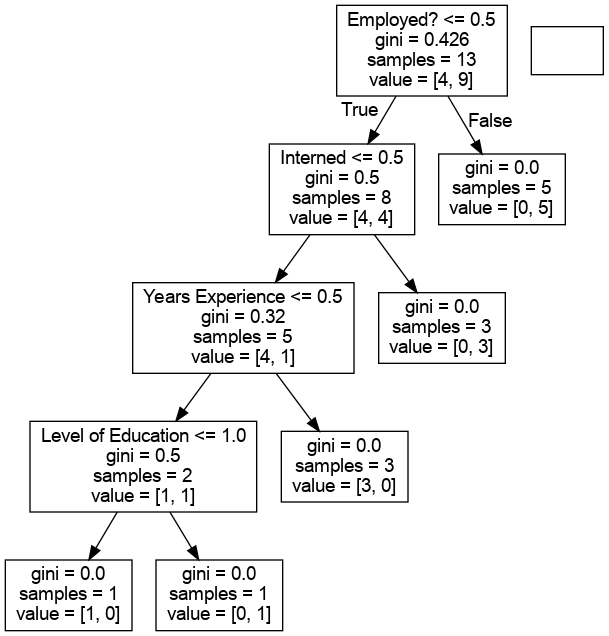

In [26]:
from IPython.display import Image  
from six import StringIO  
import pydotplus

# Visualize data

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

# Output: ../output.png

## Ensemble learning: using a random forest

We'll use a random forest of 10 decision trees to predict employment of specific candidate profiles:

In [27]:
import warnings
warnings.filterwarnings('ignore')

# random forest classifier is a collection of decision trees that are combined to make a more accurate prediction
# it is a type of ensemble method


from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)

#Predict employment of an employed 10-year veteran
print (clf.predict([[10, 1, 4, 0, 0, 0]]))
#...and an unemployed 10-year veteran
print (clf.predict([[10, 0, 4, 0, 0, 0]]))

[1]
[0]


## Activity

Modify the test data to create an alternate universe where the rules on who we should hire change according to you.

[0 0 1 0 1 0 0 0 0 1 0 1 1]


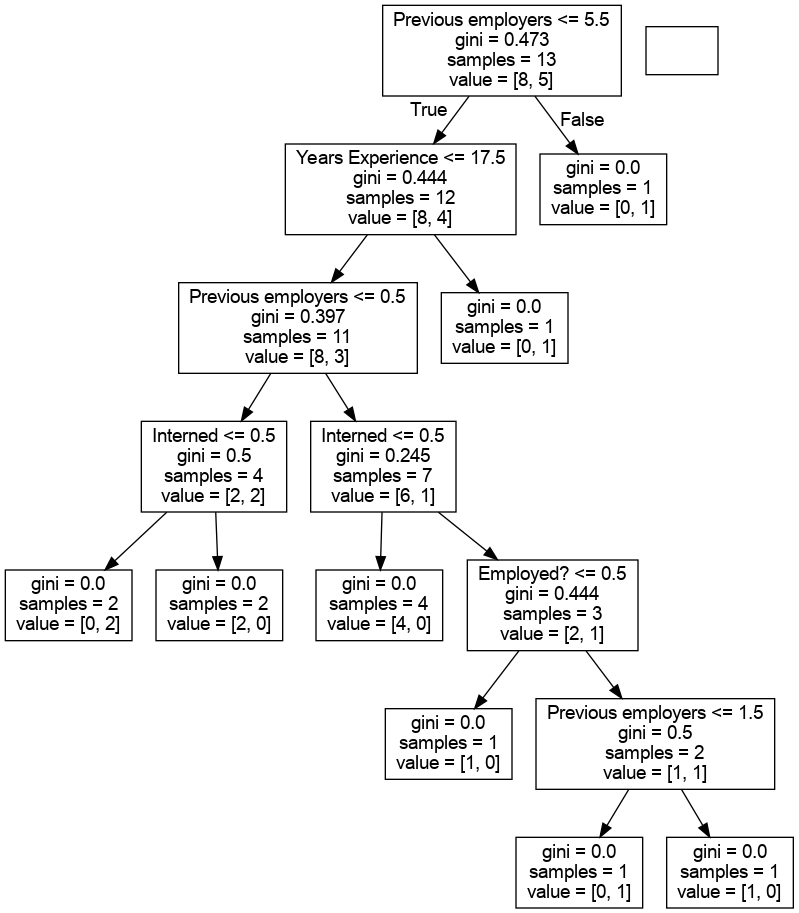

In [28]:
# modifing the test data to create an alternate universe where the rules on who we should hire change according to you.

# importing data PastHires-myUniverse.csv
input_file = "PastHires-myUniverse.csv"
df = pd.read_csv(input_file, header = 0)

# mapping the data
d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
d = {'BS': 0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)

# creating the features and the target
features = list(df.columns[:6])
y = df["Hired"]
X = df[features]

# predicting the target
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)
print (clf.predict(X))

dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data, feature_names=features)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png()) 




In [29]:
# predicting the target with the random forest
clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)
print (clf.predict(X))


[0 0 1 0 1 0 0 0 0 1 0 1 1]
